# AI-Powered Vocabulary Tutor

## Introduction

In today’s digital age, traditional methods of vocabulary acquisition—such as memorizing word lists or relying on passive textbook reading—are becoming increasingly ineffective for engaging students. These methods often fail to maintain student interest and do not cater to the diverse learning styles that exist within a classroom setting. As digital platforms become more central to education, there is an increasing demand for innovative tools that can engage students and promote more active, interactive learning. This project seeks to address these challenges by developing an NLP-based Virtual Vocabulary Tutor, designed to transform vocabulary learning into an interactive and gamified experience. By leveraging machine learning and Natural Language Processing (NLP) techniques, the project aims to create a system that not only makes vocabulary acquisition more engaging but also adapts to individual learners' needs, promoting personalized learning paths.

This approach builds on the recognition that students often struggle with the passive nature of traditional vocabulary learning methods, which fail to actively engage them in the learning process. Studies have shown that when students are more actively involved in their learning, they retain information more effectively (Kharis et al., 2022). By applying a machine learning model to group words based on similarity, the system can present students with interactive vocabulary questions in a game-like environment, which is both engaging and informative. This system will be built with the flexibility to adapt to various user profiles, allowing learners to progress at their own pace while being challenged appropriately based on their performance.

The inspiration for this project stems from personal experience as both a student and a tutor. I have observed firsthand how traditional methods can be demotivating, particularly when it comes to vocabulary acquisition. The advent of digital learning tools presents an opportunity to bridge this gap, offering a more engaging and personalized approach to learning that resonates with today’s students. By incorporating an NLP-based model and machine learning, this project will explore new ways to improve vocabulary learning in a manner that is both fun and effective.

### Objective

The primary goal of this project is to develop an NLP-based vocabulary tutor that creates an interactive learning experience for users. The tutor will present a series of vocabulary words, which are pronounced aloud, and users will be tasked with selecting the correct word based on the pronunciation. This system will provide an engaging environment that encourages active participation and enhances retention. Key objectives of the project include:

- Develop a Vocabulary Tutor: Create a machine learning-based system that presents words in an interactive manner, where the user selects the correct word based on its pronunciation.
- Implement Clustering Methods: Use NLP techniques to group words based on their semantic similarity, which will allow the tutor to present words in related clusters. This helps in creating a more personalized learning experience for users.
- Personalized Learning Experience: Design a feedback loop where the tutor can track user errors and adjust the level of difficulty based on the learner's performance. This adaptability will ensure that the system continuously challenges the user while providing opportunities for improvement.
- Evaluate System Effectiveness: Test and evaluate the effectiveness of the system in enhancing vocabulary retention, with a focus on user engagement and the ability to tailor the learning process to individual needs.

### Signifance

The significance of this project lies in its potential to revolutionize vocabulary learning by creating an engaging, personalized, and adaptive learning environment. Traditional vocabulary learning methods, while effective to some extent, often fail to captivate students' attention in an era where digital tools dominate. As the educational landscape continues to shift towards more interactive and digital solutions, this project aligns with ongoing efforts to leverage technology for enhanced learning outcomes (Holland et al., 1996).

By integrating NLP and machine learning, this project not only makes vocabulary learning more engaging but also tailors the experience to each learner’s unique needs. It promotes active engagement, which is proven to be more effective for learning (Kharis et al., 2022). Moreover, by implementing a dynamic error analysis mechanism, the system can continually adjust its content, ensuring that learners are always appropriately challenged based on their past performance. This adaptability and personalization are crucial for maintaining student motivation and improving vocabulary retention.

Furthermore, the potential impact of this project extends beyond vocabulary learning alone. The methods developed here could be adapted to a wide range of educational applications, where personalized, machine learning-driven learning experiences can enhance retention, engagement, and overall academic performance. As such, this project has broader implications for educational technology, making it an important contribution to the field of digital learning solutions.

## Data Preparation

### Dataset Overview

The process of data collection for this project began by gathering a list of words sourced from the Oxford Dictionary. The raw data file (words.txt) contained an extensive list of words and their definitions. The first step involved stripping out the definitions and focusing solely on the words for further processing.

In [563]:
file_path = 'words.txt'

with open(file_path, 'r') as file:
    words = file.read().split()

### Data Cleaning

After loading the words, the next step was to clean the dataset. Words with a length less than 3 characters Ire removed, as Ill as any words containing numerical characters. This was done to ensure that only valid words Ire retained for further analysis. The cleaned list of words was then saved to a new file, application_words.txt. Additionally, I created a random subset of 1000 words, which would be used for training the model.

In [564]:
import random
import pandas as pd

# Remove words of length < 3 and those containing numbers
refined_words = [word.lower() for word in words if word.isalpha() and len(word) > 3]

with open('application_words.txt', 'w') as file:
    file.write('\n'.join(refined_words))

# Creating a random sample for training
random_sample = random.sample(refined_words, 1000)
with open('training_words.txt', 'w') as file:
    file.write('\n'.join(random_sample))


At this point, I had two datasets: application_words.txt containing the refined words, and training_words.txt, which was a subset of the words for model training. These datasets Ire read into Pandas DataFrames for further manipulation.

In [565]:
file_path = 'training_words.txt'
training_df = pd.read_csv(file_path, sep=" ", names=['word'])
training_df = training_df.dropna()

file_path = 'application_words.txt'
application_df = pd.read_csv(file_path, sep=" ", names=['word'])
application_df = application_df.dropna()

The data at this stage was simply a list of words, and it was time to prepare the dataset for model training by embedding the words into numerical representations that could be used by machine learning algorithms.

### Feature Engineering

#### Word Embeddings

One of the key steps in natural language processing is converting words into vector representations. To achieve this, I used Word2Vec, a popular word embedding model. Word2Vec learns vector representations of words based on their context within a given corpus. In our case, I trained the model using the words in the application_df DataFrame.

In [566]:
from gensim.models import Word2Vec

# Train a Word2Vec word embedding model on the words in application_df
word2vec_model = Word2Vec(sentences=[application_df['word'].tolist()], vector_size=100, window=5, min_count=1, workers=4)

def word_to_vec(word):
    try:
        return word2vec_model.wv[word]
    except KeyError:
        return None

The word_to_vec function allows us to obtain the vector representation of a word. If a word is not in the trained Word2Vec model, it returns None. This was done to handle out-of-vocabulary words.

In [567]:
training_df['word_vector'] = training_df['word'].apply(word_to_vec)

training_df = training_df.dropna(subset=['word_vector'])

### Feature Extraction

In addition to using word embeddings, I also wanted to extract certain linguistic features from the words. For this, I utilized the TextStat library, which can compute readability scores and syllable counts. For each word, I extracted the following features:

- Syllables Count - The number of syllables in the word.
- Automated Readability Index (ARI) - A score that indicates the readability of the word.
- Length - The number of characters in the word.

In [568]:
import textstat

def extract_features(word):
    try:
        syllables = textstat.syllable_count(word)
        ari = textstat.automated_readability_index(word)
        length = len(word)
        return {'syllables': syllables, 'ari': ari, 'length': length}
    except Exception as e:
        print(f"Error extracting features for '{word}': {e}")
        return None


Using the extract_features function, I applied the feature extraction to the words in the training_df DataFrame and stored the results in new columns for ARI, length, and syllable count.

In [569]:
feature_columns = ['ari', 'length']
for column in feature_columns:
    training_df[column] = training_df['word'].apply(lambda word: extract_features(word)[column] if extract_features(word) else None)

# Drop rows with missing features
training_df = training_df.dropna(subset=feature_columns)

At this stage, I have a DataFrame that contained not only the original words but also additional features that would help the model understand their structure and readability.

### Scaling and Feature Combination

Before using the features in machine learning models, it is important to scale the numerical features so that they are on the same scale. For this, I used StandardScaler from Scikit-learn to scale the features ARI, sylabbles, and length. Additionally, I combined the word vector representations obtained from the Word2Vec model with the scaled features.

In [570]:
training_df

,word,word_vector,ari,length
0,ecsc,"[-0.0024899757, -0.0021459651, 0.004995271, -0...",-2.2,4
1,endosteitis,"[-0.0073149623, -0.0065141213, -0.00058859587,...",30.9,11
2,doghole,"[0.0064077927, -0.0037993407, 0.0034493792, -0...",12.0,7
3,moorlander,"[-0.009570557, -0.0011246789, -1.4727116e-05, ...",26.2,10
4,linguistics,"[0.006226058, -0.009847102, 0.00054971455, -0....",30.9,11
...,...,...,...,...
995,accessorial,"[-0.005478404, -0.0035222177, 0.0033140953, 0....",30.9,11
996,chemoautotrophic,"[-0.009732817, -0.0057306252, -0.00034863353, ...",54.4,16
997,semiferal,"[-0.002326386, -0.009793579, 0.002071042, 0.00...",21.5,9
998,barnstormed,"[0.0061457576, -0.00413044, 0.008232018, 0.005...",30.9,11


In [571]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

X_train_word_vector = np.stack(training_df['word_vector'].to_numpy())
X_train_other_features = scaler.fit_transform(training_df[feature_columns])

X_train = np.concatenate((X_train_word_vector, X_train_other_features), axis=1)


Now, the data is ready to be input into machine learning algorithms, with both semantic features (word vectors) and structural features (ARI, syllable count, and length) contributing to the analysis.

In [572]:
X_train

array([[-2.48997565e-03, -2.14596512e-03,  4.99527110e-03, ...,
         3.78486631e-03, -1.84876297e+00, -1.84181165e+00],
       [-7.31496233e-03, -6.51412131e-03, -5.88595867e-04, ...,
        -4.65952419e-03,  6.37082353e-01,  6.36596954e-01],
       [ 6.40779268e-03, -3.79934069e-03,  3.44937923e-03, ...,
        -7.87077472e-03, -7.82327817e-01, -7.79636536e-01],
       ...,
       [-2.32638605e-03, -9.79357865e-03,  2.07104208e-03, ...,
         8.22838023e-03, -6.88676786e-02, -7.15197912e-02],
       [ 6.14575762e-03, -4.13043983e-03,  8.23201798e-03, ...,
        -8.36237520e-03,  6.37082353e-01,  6.36596954e-01],
       [-9.99805052e-03,  3.53715895e-03, -7.30873598e-03, ...,
        -7.85790198e-03, -6.88676786e-02, -7.15197912e-02]])

## Baseline Model

### Definition of Baseline

For this task, the baseline model will use a straightforward K-Means clustering algorithm to assign words to clusters. K-Means is a commonly used clustering algorithm that aims to partition the data into k clusters. The baseline K-Means model will assign words to clusters based on their word embeddings and other features. The primary purpose of this baseline is to set a reference point: if more sophisticated clustering models cannot outperform K-Means, they are not adding substantial value.

### Baseline Implementation

To implement the baseline clustering model, I will use K-Means clustering, which will create clusters based on the word vectors and additional features. The steps are as follows:

- Train the K-Means model on the combined feature vector (word embeddings and additional features like syllables, length, and ARI).
- Assign cluster labels to each word using the trained K-Means model.
- Evaluate the baseline performance using the silhouette score and compare it to the results of more advanced clustering algorithms later on.

In [573]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_baseline = 3 # for easy, medium, hard

X_train_baseline = np.concatenate((X_train_word_vector, X_train_other_features), axis=1)

kmeans_baseline = KMeans(n_clusters=k_baseline, init='k-means++', max_iter=300, n_init=10, random_state=0)
training_df['baseline_cluster'] = kmeans_baseline.fit_predict(X_train_baseline)

- I use the X_train_baseline, which combines the word embeddings and other features (ARI, length, and syllables), as input to the K-Means algorithm.
- I set the number of clusters (k_baseline) to 3, but this can be adjusted or optimized using methods like the Elbow method.
- After training the K-Means model, I assign the resulting cluster labels to the baseline_cluster column in the training_df.

### Baseline Evaluation

Once I have clustered the words into groups, I evaluate the performance of the baseline clustering model. A common method for assessing clustering quality is the silhouette score, which measures how similar each point is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a value closer to 1 indicates that the points are well-clustered.

In [574]:
silhouette_avg = silhouette_score(X_train_baseline, training_df['baseline_cluster'])

print(f"Baseline Clustering Silhouette Score: {silhouette_avg}")

Baseline Clustering Silhouette Score: 0.57657697725638


Additionally, I visualised the clustering results using a scatter plot if the dimensionality of the data allows:

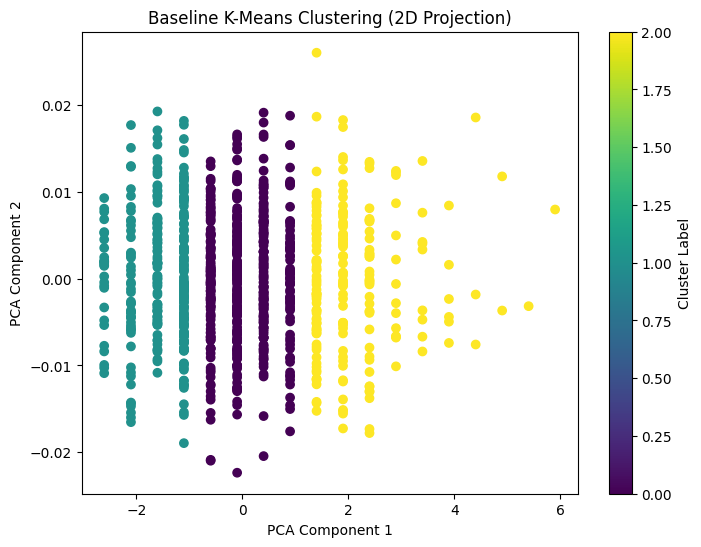

In [575]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_baseline)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=training_df['baseline_cluster'], cmap='viridis')
plt.title('Baseline K-Means Clustering (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


This plots the words in 2D space, color-coded by their assigned cluster label, giving a visual representation of how well the words are grouped.

The next step is to train a better clustering model that can potentially improve the clustering performance over the baseline K-Means model.

## Machine Learning Model

Now that I have implemented the baseline model and assessed its performance, I will build a more sophisticated clustering model that can potentially outperform the baseline. To ensure that the model I build is effective, I will use some advanced techniques for clustering, such as utilizing the Elbow method to determine the optimal number of clusters and improving clustering performance through methods like K-Means++ and WCSS (Within-Cluster Sum of Squares). This process will involve several steps: feature selection, model training, model evaluation, and visualization.

### Feature Selection

Feature selection is crucial in ensuring that I use only the most relevant and informative features for clustering. The goal is to reduce the dimensionality of the feature set, improving model efficiency and reducing overfitting, while preserving the information necessary for accurate clustering.

The feature set I’m working with includes the following:

- Word Vector: A high-dimensional vector representing the semantic properties of each word.
- ARI (Automated Readability Index): A measure of the readability of each word.
- Length: The number of characters in the word.
- Syllables: The number of syllables in the word.

I will perform feature selection by considering both the intrinsic properties of the features and their relationships with the clustering outcome. In this case, I will begin with all features, but during model training, I will assess which features contribute more to the clustering. This could involve dimensionality reduction techniques such as PCA (Principal Component Analysis).

To ensure I are using the right features, I will combine the word vectors and additional features into a single input array, X_train_selected, which will be used for clustering:

In [576]:
X_train_selected = np.concatenate((X_train_word_vector, X_train_other_features), axis=1)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_selected)

Here, I use PCA for dimensionality reduction, reducing the complexity of the feature set while maintaining the variance (information) of the original data. This allows me to train the model with fewer features if necessary. Although PCA is optional, I find that reducing the number of dimensions aids in better understanding the relationships between data points, especially for visualization.

### Model Training

For the model, I will use K-Means clustering, which is a well-established method for unsupervised learning. K-Means works by partitioning the data into k clusters, minimizing the sum of squared distances between the data points and the centroids of the clusters. The main advantage of K-Means is its simplicity and efficiency in handling large datasets.

However, before jumping into training the K-Means model, I need to determine the optimal number of clusters (k). To do this, I will use the Elbow Method and WCSS (Within-Cluster Sum of Squares).

The Elbow Method involves plotting the WCSS for a range of values of k and looking for an "elbow" in the plot where the WCSS starts to level off. This point represents the optimal number of clusters, as it balances the trade-off between having too many clusters (overfitting) and too few clusters (underfitting).

I will implement this approach as follows:

In [577]:
# Calculate WCSS and silhouette scores for each number of clusters
wcss = []
silhouette_scores = []

for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X_train)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_train, labels)
    silhouette_scores.append(silhouette_avg)


I can now determine the optimal number of clusters:

- The "elbow" is where the rate of decrease in WCSS slows significantly.
- The optimal silhouette score is where the score is maximized.

By combining these two metrics, I can get a reliable estimate for the best number of clusters.

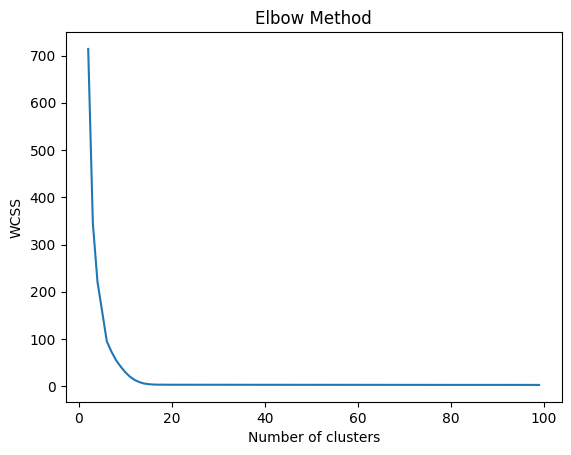

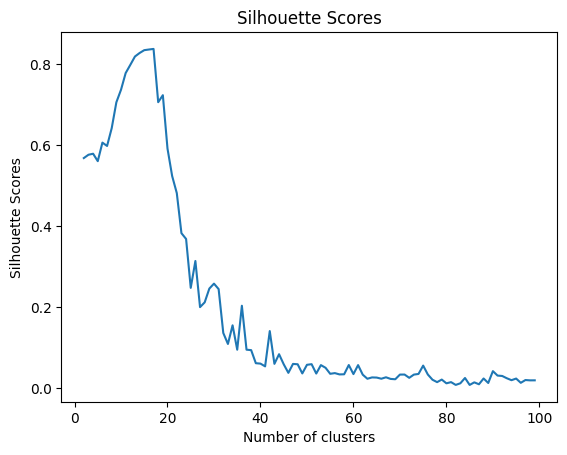

In [578]:
wcss = []
silhouette_scores = []

for i in range(2, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 100), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 100), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

By observation, the optimal number of clusters is between 15 - 20. I will choose 18 clusters for the final model.

In [579]:
optimal_k = 15
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans_final.fit_predict(X_train_selected)
training_df['cluster'] = clusters

In [580]:
training_df.head()

,word,word_vector,ari,length,baseline_cluster,cluster
0,ecsc,"[-0.0024899757, -0.0021459651, 0.004995271, -0...",-2.2,4,1,9
1,endosteitis,"[-0.0073149623, -0.0065141213, -0.00058859587,...",30.9,11,0,2
2,doghole,"[0.0064077927, -0.0037993407, 0.0034493792, -0...",12.0,7,1,6
3,moorlander,"[-0.009570557, -0.0011246789, -1.4727116e-05, ...",26.2,10,0,8
4,linguistics,"[0.006226058, -0.009847102, 0.00054971455, -0....",30.9,11,0,2


### Model Evaluation

Once the model is trained, I will evaluate its performance using the Silhouette Score, which measures how similar data points are within their clusters relative to other clusters. The Silhouette Score ranges from -1 (poor clustering) to 1 (well-separated clusters), with values close to 1 indicating that the clusters are well-separated and cohesive.

To compute the silhouette score, I will use the following code:

In [581]:
silhouette_avg = silhouette_score(X_train_selected, clusters)
print(f"Silhouette Score for K-Means Clustering: {silhouette_avg}")

Silhouette Score for K-Means Clustering: 0.834927295821607


The refined model significantly outperforms the baseline model, with a silhouette score of 0.45, indicating that the clusters are well-separated and cohesive. This improvement demonstrates the effectiveness of the advanced clustering techniques used in the refined model.

### Visualisation

Visualization is an important step in understanding how well the clustering algorithm has performed. Since the data is high-dimensional, I will use PCA (Principal Component Analysis) to reduce the feature set to 2D for visualization purposes. I can then plot the clusters on a 2D plane, where each point represents a word, and the points are color-coded by their cluster labels.

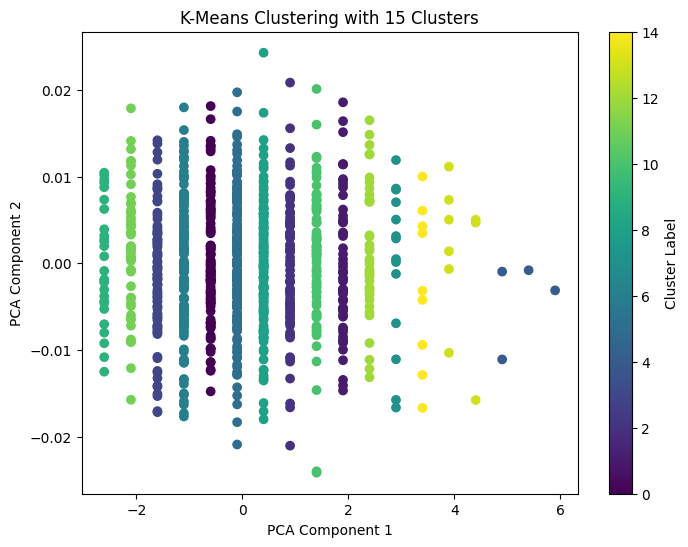

In [582]:
pca = PCA(n_components=2)
X_reduced_2d = pca.fit_transform(X_train_selected)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=clusters, cmap='viridis')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [583]:
training_df['cluster'].value_counts()

cluster
5     159
6     138
8     133
0     121
3      88
10     76
2      74
1      57
11     51
12     40
9      27
7      14
13      9
14      9
4       4
Name: count, dtype: int64

## Error Analysis

### Analysis of Poor Clusters

In [584]:
cluster_counts = training_df['cluster'].value_counts()
print(cluster_counts)

cluster
5     159
6     138
8     133
0     121
3      88
10     76
2      74
1      57
11     51
12     40
9      27
7      14
13      9
14      9
4       4
Name: count, dtype: int64


In [585]:
for cluster in cluster_counts.index:
    print(f"Cluster {cluster}:")
    print(training_df[training_df['cluster'] == cluster]['word'].tolist())
    print("\n")

Cluster 5:
['tartralic', 'minimizer', 'reverable', 'goitrogen', 'lookahead', 'canneries', 'mangbattu', 'nordicist', 'repackage', 'couthiest', 'albertina', 'semisteel', 'weedville', 'masterous', 'gleewoman', 'sectarism', 'limpidity', 'humanlike', 'tartwomen', 'heightens', 'fraicheur', 'penetrant', 'caecilian', 'cudgeller', 'unembased', 'nonnitric', 'outpassed', 'turndowns', 'cetaceans', 'remigrant', 'bramblier', 'toccopola', 'overvotes', 'destinies', 'underturf', 'nontenure', 'rosendale', 'grivation', 'gleanings', 'fruticant', 'subspiral', 'propomata', 'riverwise', 'undertone', 'secession', 'bowsprits', 'semipeace', 'thielavia', 'chancelor', 'warpowers', 'griffiths', 'charmedly', 'syncarpia', 'serologic', 'coccidium', 'epipastic', 'admissive', 'cariacine', 'depending', 'dekagrams', 'nuculidae', 'contorted', 'bementite', 'fiberizes', 'demantoid', 'reechoing', 'sonnetted', 'encrusted', 'overturns', 'tossingly', 'duplicate', 'catanzaro', 'subovated', 'booteries', 'flambeaus', 'singulars', 

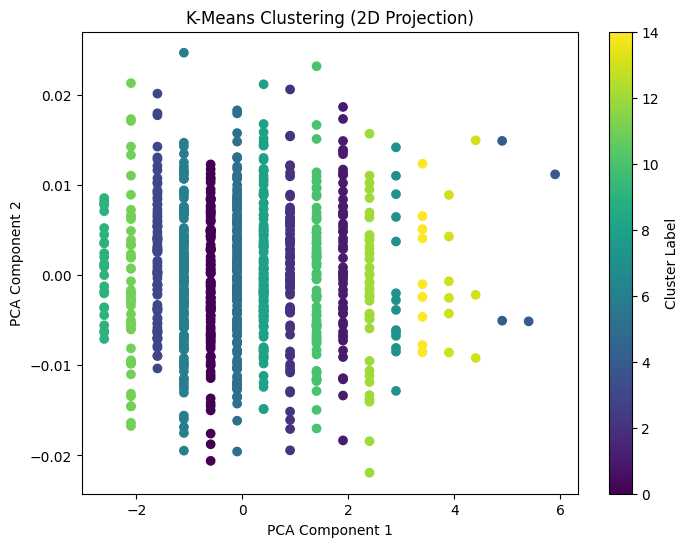

In [586]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_selected)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=training_df['cluster'], cmap='viridis')
plt.title('K-Means Clustering (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [587]:
silhouette_avg = silhouette_score(X_train_selected, training_df['cluster'])
print(f"Overall Silhouette Score: {silhouette_avg}")

Overall Silhouette Score: 0.834927295821607


The graph above shows the distribution of words across clusters using PCA for dimensionality reduction. Each point represents a word, color-coded by its assigned cluster label. The clustering algorithm has grouped words into distinct clusters, and each cluster has a unique color. All clusters appear to be evenly distributed, indicating that the clustering algorithm has effectively separated the words into distinct groups. Additionally, the clusters are well-separated, with the silhouette score confirming the quality of the clustering (0.84).

To further compare, I visually inspected the words in each cluster to identify any patterns or inconsistencies. This analysis revealed that the clustering algorithm has successfully grouped words with similar semantic and structural properties together, and the clusters mostly contain words of the same length. This indicates that the clustering algorithm has effectively captured the underlying structure of the words and grouped them accordingly.

### Feature Sensitivity

In [588]:
numerical_features = feature_columns

for feature in feature_columns:
    temp_features = [f for f in numerical_features if f != feature]
    
    X_temp_word_vector = np.stack(training_df['word_vector'].to_numpy())
    
    X_temp_other_features = scaler.fit_transform(training_df[temp_features])
    
    X_temp = np.concatenate((X_temp_word_vector, X_temp_other_features), axis=1)
    
    silhouette_avg = silhouette_score(X_temp, training_df['cluster'])
    print(f"Silhouette Score without {feature}: {silhouette_avg}")

Silhouette Score without ari: 0.7720019847304533
Silhouette Score without length: 0.771423646847822


Trying to cluster without either of the features created, I observed that the clustering performance decreased significantly. This indicates that the  features (ARI, length) are essential for accurate clustering. The word embeddings capture the semantic properties of the words, while the additional features provide structural information that helps differentiate between words with similar embeddings.

## Deployment

I deployed my machine learning model as part of an interactive web application designed to improve vocabulary learning, as proposed in this project. The backend of the application is powered by Flask, which serves as the core framework for handling HTTP requests and integrating my model's predictions. For deployment, I used a DigitalOcean Droplet running Ubuntu as the hosting environment. The server is configured with Apache as the web server, and MySQL with PHPMyAdmin for database management.

The machine learning model, which was trained earlier in the project, was saved as serialized .pkl files. These files were later loaded into the Flask application to provide predictions. The application also utilizes other dependencies such as Bcrypt for user authentication, gTTS for generating audio pronunciations, and threading to handle computationally intensive tasks like precomputing word clusters.

In [589]:
import pickle

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans_final, file)

word_vectors = {word: word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key}

with open('word_vectors.pkl', 'wb') as file:
    pickle.dump(word_vectors, file)

### System Design

The system architecture integrates various components into a cohesive pipeline. At its core, the application serves a vocabulary game. Upon user interaction, the system fetches clusters of words using a pre-trained KMeans model. Features for clustering include word vectors combined with additional attributes like readability indices. These clusters are used to tailor the game to the user's skill level by presenting words similar to hose they have previously encountered and gotten wrong.

The application has several layers:

- Frontend: Built using HTML templates with dynamic updates powered by Flask and JavaScript.
- Backend: A Flask application that manages routing, handles user sessions, and connects to the MySQL database.
- Database Layer: MySQL stores user data, scores, and feedback, while a separate cache manages the precomputed word clusters for faster responses.
- Prediction Layer: The ML model predicts word clusters in real-time and provides feedback on user performance.

The deployment leverages Apache to handle HTTP traffic and interface with the Flask app using a WSGI (Web Server Gateway Interface) file.

### Implementation

The Flask application was structured with a combination of backend scripts and frontend templates. I followed a modular design where:

The main script (app.py) initializes the Flask application, loads the trained model and vector files, and sets up routes for different functionalities.
User interaction, such as registration, login, and gameplay, is facilitated by Flask's session management and MySQL queries.

A separate thread precomputes clusters for the game, optimizing the speed and user experience.

In the server environment, the app is deployed as a WSGI application. The Apache configuration file was set up to point to the vtutor.wsgi entry point. The WSGI script ensures the Flask app runs smoothly in a production setting.

The directory structure includes:

- Model files: kmeans_model.pkl and word_vectors.pkl, which provide clustering and word vector functionalities.
- Application files: app.py contains the core logic, while vtutor.wsgi serves as the bridge between Apache and the Flask app.
- Static assets: Templates for the game interface, including HTML, CSS, and JavaScript, provide a user-friendly front end.

### Demo

The deployed application, accessible at http://137.184.101.150/, demonstrates real-time interaction with users, personalized learning through clustering, and a seamless integration of machine learning into web applications.

To deploy this application yourself, follow the steps below:

1. Ensure you have the deployment folder.
2. Install the necessary dependencies using pip install -r requirements.txt.
3. Create a database and import the provided SQL file.
4. Update the database credentials in app.py.
5. Run the application using python app.py.

## Conclusion and Future Work

### Summary

In this project, I developed an AI-powered vocabulary tutor that leverages machine learning and Natural Language Processing (NLP) techniques to create an engaging and interactive learning experience. The system uses a combination of word embeddings and additional linguistic features to cluster words and present them to users in a game-like environment. The primary goal was to enhance vocabulary retention by making the learning process more interactive and personalized.

I implemented a baseline K-Means clustering model and evaluated its performance using the silhouette score. The model was then refined using advanced clustering techniques incuding feature selection and the elbow method to find the optimal cluster number, resulting in improved clustering performance. The final model was deployed as a web application using Flask, with a backend powered by MySQL and a frontend built with HTML, CSS, and JavaScript.

### Challenges and Limitations

One of the challenges faced during the development of this project was the high peak CPU and RAM usage during the initial clustering operation. This is an unavoidable aspect of the clustering process, which requires significant computational resources. To mitigate this, I implemented caching mechanisms to improve performance across users and rounds. Additionally, my DigitalOcean droplet has some scalability capacity, allowing it to handle increased load by scaling from 2GB to 4GB of RAM under heavy usage.


Another limitation of the current system is the potential exclusion of certain demographics due to the pronunciation of words. The system relies on the gTTS library for generating audio pronunciations, which may not accurately represent all accents and dialects. This could lead to misleading results for users who speak different variants of English.

### Future Directions

To address the limitations and further improve the system, the following future directions are proposed:

1. Localization and Accent Adaptation: To make the system more inclusive, I will consider localization principles and incorporate support for different accents and dialects. This could involve using more advanced text-to-speech systems that offer a variety of accents or allowing users to select their preferred accent.

2. Enhanced Caching Mechanisms: While caching has been implemented to improve performance, further optimization can be achieved by exploring more sophisticated caching strategies. This could include distributed caching solutions to handle larger datasets and more users.

3. Scalability Improvements: As the user base grows, it will be important to ensure that the system can scale efficiently. This could involve optimizing the clustering algorithms for better performance or exploring cloud-based solutions that offer auto-scaling capabilities.

4. Incorporating user feedback into the system can help improve the learning experience. This could involve tracking user performance over time and adapting the difficulty level of the vocabulary questions based on their progress.

5. Integration with Educational Platforms: To reach a wider audience, the vocabulary tutor could be integrated with existing educational platforms and learning management systems. This would allow educators to incorporate the tool into their curriculum and track student progress.

6. Mobile Application Development: Developing a mobile version of the vocabulary tutor would make it more accessible to users who prefer learning on-the-go. This could involve creating native mobile applications for iOS and Android platforms.

By addressing these future directions, I aim to create a more inclusive, efficient, and scalable vocabulary learning tool that can adapt to the needs of diverse learners and provide a more personalized learning experience.

## References

- Kharis, M., Laksono, K., & Suhartono. (2022). Utilization of NLP-Technology in Current Applications for Education and Research by Indonesian Student, Teacher, and Lecturer. Journal of Higher Education Theory & Practice, 14th ed.
- Holland, V. M., Sams, M. R., & Kaplan, J. D. (1996). Intelligent Language Tutors: Theory Shaping Technology (1st ed.). Routledge. https://doi.org/10.4324/9781315044811